# Problem 4> K-means, K-medoids

## 1. Load and Visualize the dataset (2p)

In [1]:
import numpy as np
from time import time

TODO module

> Reference:
<br> matplotlib 
<br> https://m.blog.naver.com/PostView.nhn?blogId=infoefficien&logNo=221057152472&proxyReferer=https%3A%2F%2Fwww.google.com%2F
<br> confusion_matrix 
<br> https://scikit-learn.org/0.16/modules/generated/sklearn.metrics.confusion_matrix.html
<br> numpy.linalg.norm() method
<br>https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
<br><br> from sklearn.cluster import KMeans
<br>https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
<br><br> K mean cluster algoritm 
<br> idea: https://ratsgo.github.io/machine%20learning/2017/04/19/KC/
<br> code1: https://mubaris.com/posts/kmeans-clustering/
<br> code2: https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python
<br><br> random
<br> https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.sample.html

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.metrics import confusion_matrix
import timeit

In [5]:
# You don't need to modify this cell

## Load data

X_1 = np.load('./data_4_1.npy') # data_1

data_2 = np.load('./data_4_2.npz') # data_2
X_2 = data_2['X']
y_2 = data_2['y']

# Sanity check
print('Data shape: ', X_1.shape) # (1500, 2)
print('Data shape: ', X_2.shape) # (1500, 6)
print('Data shape: ', y_2.shape) # (1500,)

Data shape:  (1500, 2)
Data shape:  (1500, 6)
Data shape:  (1500,)


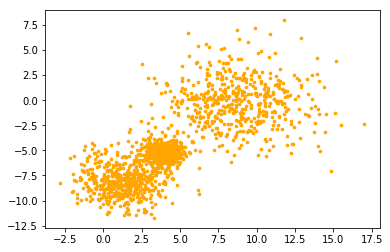

In [6]:
# TODO: Implement the function to plot the data.
plt.scatter(X_1[:,0], X_1[:,-1], color = 'orange', s = 7)

## 2. Implement k-means and k-medoids algorithm  (20p)

In this problem, the final goal is to complete "kmeans" and "kmedoids' function. 
To this end, please follow the step by step instructions in this problem.
After implementation you should apply your function to data_1(X_1) and plot the clusters for three different k values (k=2,3,4).
You should assign a different color for each class.

For this problem, you cannot use any external libraires except Numpy!

### #1. Distance and Cost function

To assign each data point to a specific class, we need to measure the distance between data points. You should write up the following 'distance' function.
Here, we will use "squared Euclidean distance" as a metric measure.
Also implement the cost function to calcuate the cost(error) reference to slide 13 of lecture 15

> N is # of instances, p is # of dimension for each data instance, K is # of clusters 
<br> data $ \in R^{N \times p}$ 
<br> centriods $ \in R^{K \times p}$ 
<br> clusters means data_cluster_indice 
<br> the number of clusters $ = {K}$
<br> distances's dimension $ K \times p $

In [7]:
def distance(x1, x2):
################################################################################
# TODO: Implement the function to measure "squared Euclidean distance"         #
#   - Squared Euclidean distance is defined by d(x1, x2) = (x1-x2)(x1-x2)'     #
#   - x1 and x2 can be matrices (calculating many points at once)              #
#     as well as vectors (calculating the distance one-by-one point)           #
################################################################################
    
    # Write your code here
    dist = None 
    if x1.shape == x2.shape:
        dist = np.linalg.norm(x1 - x2, axis = 0)**2
    else:
        dist = np.linalg.norm(x1 - x2, axis = 1)**2
    return dist

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [8]:
def cost(data, centroids, clusters):
    
################################################################################
# TODO: Implement cost(error) function reference to slide 13 of lecture 15
#       For k-medoids, just substitue center points in the formula with medoids. 

#       You can use this cost function for both k-means and k-medoids.
#       You'd better call distance function for implementing this function
################################################################################ 
    
    # Write you code here
    error = 0
    for i in range(len(data)):
        error += distance(data[i], centroids[clusters[i]])
    return error

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

### #2. Stopping criteria 

k-means and k-medoids clustering algorithm repeats "assign" and "update" steps until a stopping criterion is met. Design and implement your own stopping conditions.

**Question #1 :** What is your stopping criteria? You should design at least two conditions.

**Your Answer:** 
><br> when the error is lower than 1e-8 or iteration is more than 30, the iteration is stopped 

In [9]:
def stopping_criteria(error, iteration):
################################################################################
# TODO: Implement the function for stopping criteria                           #
#   - You can take any inputs as an argument                                   #
#   - Make sure that the output of the function is the type of 'boolean'       #
################################################################################ 

    # Write your code here
    is_stop = None
    if (error < 1e-8 or iteration > 30):
        is_stop = False
    else:
        is_stop = True
    return is_stop

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

### #3. k-means  algorithm

You should write up the following function.

> Expectation Step: Assigning each value to its closest cluster, that is, find cluster index for each data
<br> Maximization Step: Finding the new centroids by taking the average value

In [10]:
def expectation(data, centroids, K):
    # Assigning each value to its closest cluster
    data_cluster_indice = np.zeros(len(data), int)
    for i in range(len(data)):
        distances = distance(data[i], centroids)
        cluster_index = np.argmin(distances)
        data_cluster_indice[i] = cluster_index
    return data_cluster_indice

def maximization(data, data_cluster_indice, K):
    # Finding the new centroids by taking the average value
    centroids_new = np.zeros((K, np.size(data, axis = 1)))
    for i in range(K):
        points = [data[j] for j in range(len(data)) if data_cluster_indice[j] == i]
        centroids_new[i] = np.mean(points, axis=0)
    return centroids_new

In [11]:
def kmeans(data, k):
################################################################################
# TODO: Implement k-means algorithm                                             #
################################################################################   
    
    # Write your code here
    
    # Setup 
    clusters = np.zeros(len(data), int) # you can change the type of this variable
    centroids_old = centroids_new = np.zeros((k, np.size(data, axis = 1)))
    error = 1e+10
    
    # 0. Choose k initial cluster centers 
#     centroids = None
    k_random_row_indice = random.sample(range(0,len(data)), k)
    centroids_old = data[k_random_row_indice, :]

    # initial point plot
    plt.clf()
    plt.subplot(1,2,1)
    plt.scatter(data[:,0], data[:,1], c= 'r', s = 7)
    plt.scatter(centroids_old[:,0], centroids_old[:,1], marker='*', c='#050505', s=150)
    plt.title("inital point")
    
    iteration = 0
    is_continue = stopping_criteria(error, iteration)
    while is_continue:
        # Algorithm procedure:
        #   1. Compute point-to-cluster-centroid distances of all data points to each centroid
        #   2. Assign each point to the cluster with the closest centroid.
        clusters = expectation(data, centroids_old, k)
        #   3. Update the centroid values: the average of the points in each cluster
        centroids_new = maximization(data, clusters, k)
        centroids_old = centroids_new
        error = cost(data, centroids_new, clusters)
        
        # Loop should run until a stopping criterion is satisfied
        iteration += 1
        is_continue = stopping_criteria(error, iteration)
    
    colors = ['r', 'b', 'g', 'y', 'c', 'm']
    # final point plot
    plt.subplot(1,2,2)
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='#050505', s=150)
    plt.title("after clustering")
    
    print("final error = ",error)
    
    return centroids_new, clusters 

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

>initialization 

[[  5.33288956  -4.64233597]
 [  0.93971544  -8.07921817]
 [  4.50016242 -10.2845638 ]]


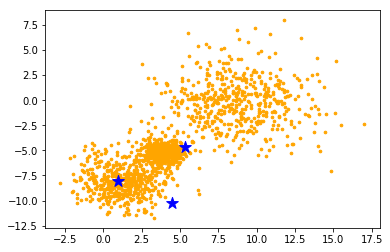

In [12]:
k_random_row = random.sample(range(0,len(X_1)), 3)
centers = X_1[k_random_row, :]
print(centers)
# Plot the data and the centers generated as random
plt.clf()
plt.scatter(X_1[:,0], X_1[:,1], c= 'orange', s = 7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='b', s=150)

In [11]:
# kmeans(X_1, 2)

In [12]:
# kmeans(X_1, 3)

In [13]:
# kmeans(X_1, 4)

### #4. k-medoids algorithm

You should write up the following function.

In [14]:
def maximization_medoids(data, data_cluster_indice, K):
    # Finding the new centroids by taking the average value
    centroids_new = np.zeros((K, np.size(data, axis = 1)))
    
    # for each cluster 
    for k in range(K):
        points = [data[i] for i in range(len(data)) if data_cluster_indice[i] == k]
        distances = np.zeros(len(points))
        for i in range(len(points)):
            for j in range(len(points)):
                distances[i] += distance(points[i], points[j])
        clusteroid_index = np.argmin(distances)
        centroids_new[k] = points[clusteroid_index]
    
    return centroids_new

In [15]:
def kmedoids(data, k):
################################################################################
# TODO: Implement k-medoids algorithm                                          #
################################################################################   
    
    # Write your code here
    
    # Setup 
    clusters = np.zeros(len(data), int) # you can change the type of this variable
    centroids_old = centroids_new = np.zeros((k, np.size(data, axis = 1)))
    error = 1e+10
    
    # 0. Choose k initial cluster centers 
    k_random_row_indice = random.sample(range(0,len(data)), k)
    centroids_old = data[k_random_row_indice, :]

    # initial point plot
    plt.clf()
    plt.subplot(1,2,1)
    plt.scatter(data[:,0], data[:,1], c= 'r', s = 7)
    plt.scatter(centroids_old[:,0], centroids_old[:,1], marker='*', c='#050505', s=150)
    plt.title("inital point")

    iteration = 0
    is_continue = stopping_criteria(error, iteration)
    while is_continue:
        # Algorithm procedure:
        #   1. Compute point-to-cluster-centroid distances of all data points to each centroid
        clusters = expectation(data, centroids_old, k)
        
        #   2. Assign each point to the cluster with the closest centroid.
        centroids_new = maximization(data, clusters, k)
        
        #   3. Update the centroid values: For a given cluster, a data point that minimizes 
        #      the sum of distances to ohter points in that cluster
        centroids_new = maximization_medoids(data, clusters, k)
        centroids_old = centroids_new
        error = cost(data, centroids_new, clusters)

        # Loop should run until a stopping criterion is satisfied
        iteration += 1
        is_continue = stopping_criteria(error, iteration)
        
    colors = ['r', 'b', 'g', 'y', 'c', 'm']
    # final point plot
    plt.subplot(1,2,2)
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='#050505', s=150)
    plt.title("after clustering")
    
    print("final error = ",error)

    return centroids_new, clusters 

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [16]:
# kmedoids(X_1, 2)

In [17]:
# kmedoids(X_1, 3)

In [18]:
# kmedoids(X_1, 4)

### #5. Apply clustering and plot the result

Apply clustering using 'kmeans' and 'kmedoids' function for data_1(X_1) with k=3 and plot the result.

final error =  12182.91441332608


(array([[ 2.63434186, -6.55097678],
        [ 8.8284977 , -0.08219273]]), array([1, 0, 0, ..., 0, 0, 0]))

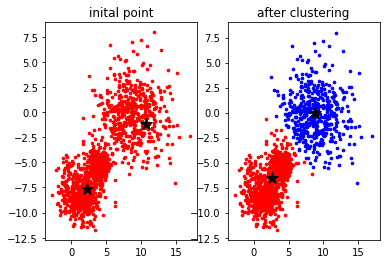

In [19]:
# TODO : Plot the result for different k values(K=2,3,4) for each algorithm using data_1(X_1).
kmeans(X_1, 2)

final error =  10222.159768006168


(array([[10.80342367, -1.22995312],
        [ 2.62615814, -6.570674  ],
        [ 7.20865387,  0.76512923]]), array([0, 1, 1, ..., 1, 1, 1]))

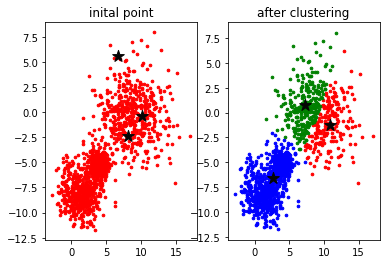

In [20]:
kmeans(X_1, 3)

final error =  7190.016282541632


(array([[-0.1183693 , -7.34068648],
        [ 3.90911883, -5.13103008],
        [ 1.88014791, -8.81829594],
        [ 8.92866767,  0.02108135]]), array([3, 2, 1, ..., 1, 2, 2]))

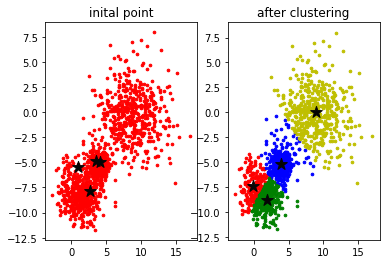

In [21]:
kmeans(X_1,4)

final error =  12243.244627293281


(array([[ 2.44175219, -6.43104112],
        [ 8.9541391 , -0.09431043]]), array([1, 0, 0, ..., 0, 0, 0]))

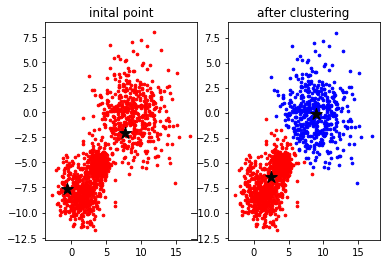

In [22]:
kmedoids(X_1, 2)

final error =  7845.312641427669


(array([[ 3.83457645, -5.21469451],
        [ 1.06682967, -8.41456607],
        [ 8.9541391 , -0.09431043]]), array([2, 1, 0, ..., 0, 1, 1]))

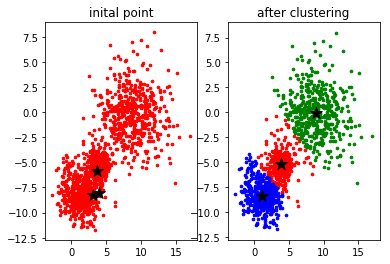

In [23]:
kmedoids(X_1, 3)

final error =  5913.015584947874


(array([[ 7.30778168,  0.83888407],
        [10.96445869, -1.17581642],
        [ 3.83457645, -5.21469451],
        [ 1.06682967, -8.41456607]]), array([1, 3, 2, ..., 2, 3, 3]))

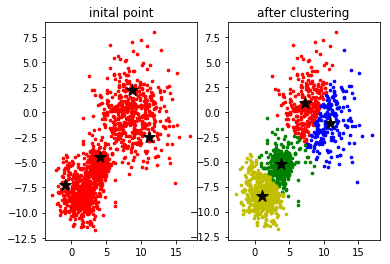

In [24]:
kmedoids(X_1, 4)

## 3. Comparing K-means with K-medoids (12p) 

Now apply k-means and k-medoids algorithm to data_2(X_2, y_2). y_2 is the ground-truth cluster label.
Experiment five times, changing the initial points for each trial. 

Report confusion matrix, error(cost function in previous problem), running time of each algorithm by averaging each result.(For confusion matrix, just average each value) 

You can easily measure running time by 'time' function already loaded.

Also, you can use any kinds of external libraries 
except for applying k-means and k-medoids(You should use the function in previous problem).

In [25]:
def kmeans(data, k):
################################################################################
# TODO: Implement k-means algorithm                                             #
################################################################################   
    
    # Write your code here
    
    # Setup 
    clusters = np.zeros(len(data), int) # you can change the type of this variable
    centroids_old = centroids_new = np.zeros((k, np.size(data, axis = 1)))
    error = 1e+10
    
    # 0. Choose k initial cluster centers 
    k_random_row_indice = random.sample(range(0,len(data)), k)
    centroids_old = data[k_random_row_indice, :]
    
    iteration = 0
    is_continue = stopping_criteria(error, iteration)
    while is_continue:
        # Algorithm procedure:
        #   1. Compute point-to-cluster-centroid distances of all data points to each centroid
        #   2. Assign each point to the cluster with the closest centroid.
        clusters = expectation(data, centroids_old, k)
        #   3. Update the centroid values: the average of the points in each cluster
        centroids_new = maximization(data, clusters, k)
        centroids_old = centroids_new
        error = cost(data, centroids_new, clusters)
        
        # Loop should run until a stopping criterion is satisfied
        iteration += 1
        is_continue = stopping_criteria(error, iteration)
    
    return error, centroids_new, clusters 

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [26]:
def kmedoids(data, k):
################################################################################
# TODO: Implement k-medoids algorithm                                          #
################################################################################   
    
    # Write your code here
    
    # Setup 
    clusters = np.zeros(len(data), int) # you can change the type of this variable
    centroids_old = centroids_new = np.zeros((k, np.size(data, axis = 1)))
    error = 1e+10
    
    # 0. Choose k initial cluster centers 
    k_random_row_indice = random.sample(range(0,len(data)), k)
    centroids_old = data[k_random_row_indice, :]

    iteration = 0
    is_continue = stopping_criteria(error, iteration)
    while is_continue:
        # Algorithm procedure:
        #   1. Compute point-to-cluster-centroid distances of all data points to each centroid
        clusters = expectation(data, centroids_old, k)
        
        #   2. Assign each point to the cluster with the closest centroid.
        centroids_new = maximization(data, clusters, k)
        
        #   3. Update the centroid values: For a given cluster, a data point that minimizes 
        #      the sum of distances to ohter points in that cluster
        centroids_new = maximization_medoids(data, clusters, k)
        centroids_old = centroids_new
        error = cost(data, centroids_new, clusters)

        # Loop should run until a stopping criterion is satisfied
        iteration += 1
        is_continue = stopping_criteria(error, iteration)

    return error, centroids_new, clusters 

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [27]:
# TODO : Report confusion matrix, error, running time of each algorithm by averaging each result.
print("====== k means clustering ====== ")
for i in range(5):
    print(i,"th iteration ... ")
    start = timeit.default_timer()
    [error, _, y_pred] = kmeans(X_2, 3)
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    print('error: ', error)
    print(confusion_matrix(y_2, y_pred))
    
print("====== k medoid clustering ====== ")
for i in range(5):
    print(i,"th iteration ... ")
    start = timeit.default_timer()
    [error, _, y_pred] = kmedoids(X_2, 3)
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    print('error: ', error)
    print(confusion_matrix(y_2, y_pred))

====== k means clustering ====== 
0 th iteration ... 
Time:  1.0437467000000424
error:  8824.982788063038
[[432   9  59]
 [  0  13 487]
 [  0 456  44]]
1 th iteration ... 
Time:  1.0027708999999732
error:  8824.982788063038
[[  9 432  59]
 [ 13   0 487]
 [456   0  44]]
2 th iteration ... 
Time:  1.003488900000093
error:  8824.982788063038
[[ 59   9 432]
 [487  13   0]
 [ 44 456   0]]
3 th iteration ... 
Time:  0.9720897999999352
error:  10747.352815038908
[[490   0  10]
 [482   1  17]
 [ 19 235 246]]
4 th iteration ... 
Time:  1.026384300000018
error:  10738.798934064931
[[  9   1 490]
 [ 16   2 482]
 [224 260  16]]
====== k medoid clustering ====== 
0 th iteration ... 
Time:  202.6357207000001
error:  8862.442052199804
[[  9  48 443]
 [ 13 487   0]
 [453  47   0]]
1 th iteration ... 
Time:  275.30654360000005
error:  10833.989511887772
[[  9   1 490]
 [ 17   2 481]
 [225 260  15]]
2 th iteration ... 
Time:  191.89349670000001
error:  8862.442052199804
[[  9 443  48]
 [ 13   0 487]
 [4

**Question #1 :** Explain why these two results are different through the characteristics of the two algorithms(K-means, K-medoids)

**Your Answer:** 
> <br> The objective of K-means clustering and K-medoids is same, which is to find K clustering given dataset by minimizing the cost as you can see below.  
$$ \underset{c_i \in C}{\operatorname{argmin}}\sum_{k=1}^{K}{\sum_{x \in C_k}{d(x,m_k)}} $$ where $d(x,m_k)$ means squared Euclidean distance 
The finding ways is divided into 2 step. first one is the expectation, which is labelling process for each data point. second is the maximation, which is updating centroids ${m_k}$ for all $k$.     
<br> $K$ = # of clusters
<br> $N$ = # of dataset 
<br> In this situation, the big difference of K-means and K-mediods is the way how the $m_k$ are updated 
- For k means algorithm 
<br> easily update centroids for all $k = 1,2,..,K$ 
$$m_k = E(x|x \in C_k)$$
<br> so, the time complexity is $O(tdKN)$
<br> $t$ = # of iteration
<br> $d$ = the dimension of the data 
<br> some properties: 
 - sensitive to initial seed points
 - susceptible to outlier, density, distribution
 - not possible for computing clusters with non-convex shapes
- For k mediod algorithm 
<br> update centroids by finding a data point in each group that minimizes the sum of distances to oter points in that each group
<br>$C(i)=k$ means the index $i$ of $x_i \in C_k$
$$m_k = x_{i_k^*}$$
$$i_k^* = \underset{i:C(i)=k}{\operatorname{argmin}}{\sum_{C(j)=k}{d(x_i, x_j)}}$$
<br> so, the time complexity is $O(tdN^2)$
<br> some properties: 
 - applies well when dealing with categorical data, non-vector space data
 - applies well when data point coordinates are not available, but only pair-wise distances are available